<a href="https://colab.research.google.com/github/ookadeet/dspp1/blob/main/smmh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Social Media, The Attention Economy, and Mental Health
This project uses [this publicly available dataset](https://www.kaggle.com/datasets/souvikahmed071/social-media-and-mental-health) to gauge the impact of time spent on social media, and the platforms used, on mental health outcomes.

# Data Cleaning and Transformation

##Importing libraries and data

In [1]:
#Import packages
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Import data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path='/content/drive/My Drive/Colab Notebooks/data/smmh.xlsx'
df = pd.read_excel(path)

Mounted at /content/drive


In [3]:
#Explore layout of datafile
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,2022/04/18 7:18:47 PM GMT+6,21.0,Male,In a relationship,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,2022/04/18 7:19:28 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,2022/04/18 7:25:58 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,2022/04/18 7:29:43 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram,More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,2022/04/18 7:33:31 PM GMT+6,21.0,Female,Single,University Student,University,Yes,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


##Renaming and dropping columns

In [4]:
#Print column names in order to copy and paste into code for renaming
for col in df.columns:
    print(col)

Timestamp
1. What is your age?
2. Gender
3. Relationship Status
4. Occupation Status
5. What type of organizations are you affiliated with?
6. Do you use social media?
7. What social media platforms do you commonly use?
8. What is the average time you spend on social media every day?
9. How often do you find yourself using Social media without a specific purpose?
10. How often do you get distracted by Social media when you are busy doing something?
11. Do you feel restless if you haven't used Social media in a while?
12. On a scale of 1 to 5, how easily distracted are you?
13. On a scale of 1 to 5, how much are you bothered by worries?
14. Do you find it difficult to concentrate on things?
15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?
16. Following the previous question, how do you feel about these comparisons, generally speaking?
17. How often do you look to seek validation from features of social media?
18. How of

In [5]:
print(df['5. What type of organizations are you affiliated with?'].unique())

['University' 'Private' nan 'School;University' 'Company' 'School;Private'
 'University;Company' 'Goverment' 'Company;Private' 'School'
 'University;Goverment;Private' 'University;Company;Private'
 'University;Private' 'University;N/A' 'School;University;Private'
 'University;Goverment' 'University;Company;Goverment' 'School;Company'
 'School;N/A']


Neither the timstamp nor affiliated organisation columns are deemed necessary for the analysis as the timestamp only records when answers were captured, while the affiliated organisations column has rows that contain multiple answers

In [6]:
#Drop columns not needed for analysis
df = df.drop(['Timestamp','5. What type of organizations are you affiliated with?','6. Do you use social media?'], axis=1)

##Rename columns for easier referencing

In [9]:
df.rename(columns = {'1. What is your age?':'Age',
                     '2. Gender':'Gender',
                     '3. Relationship Status':'Relationship Status',
                     '4. Occupation Status':'Occupation',
                     '7. What social media platforms do you commonly use?':'Platforms',
                     '8. What is the average time you spend on social media every day?':'Hours Online',
                     '9. How often do you find yourself using Social media without a specific purpose?':'ADHD1',
                     '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD2',
                     "11. Do you feel restless if you haven't used Social media in a while?":'Anx1',
                     '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD3',
                     '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anx2',
                     '14. Do you find it difficult to concentrate on things?':'ADHD4',
                     '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'SE1',
                     '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'SE2',
                     '17. How often do you look to seek validation from features of social media?':'SE3',
                     '18. How often do you feel depressed or down?':'Dep1',
                     '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Dep2',
                     '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Dep3' },inplace=True)

In [10]:
#Check updated column list
for col in df.columns:
    print(col)

Age
Gender
Relationship Status
Occupation
Platforms
Hours Online
ADHD1
ADHD2
Anx1
ADHD3
Anx2
ADHD4
SE1
SE2
SE3
Dep1
Dep2
Dep3


##Exploring and amending values

In [11]:
#Detect null values
df.isnull().values.any()

False

In [12]:
#Check responses in gender column for any inconsistencies
print(df.Gender.unique())

['Male' 'Female' 'Nonbinary ' 'Non-binary' 'NB' 'unsure ' 'Trans'
 'Non binary ' 'There are others???']


###Gender
The row with the answer "There are others???" was dropped, as a judgement can be made that they fall into either "Male" or "Female", so including them in an "Others" category would skew the data

In [13]:
#Drop row with 'There are others???' as may skew data
df = df[df.Gender != 'There are others???']

In [14]:
#Assign anything not male or female as "Other", code from ChatGPT
df.loc[df['Gender'].isin(['Nonbinary ', 'Non-binary', 'NB', 'unsure ', 'Trans', 'Non binary ']), 'Gender'] = 'Other'
print(df.Gender.unique())

['Male' 'Female' 'Other']


In [15]:
#Check data types for any inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 473
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  473 non-null    float64
 1   Gender               473 non-null    object 
 2   Relationship Status  473 non-null    object 
 3   Occupation           473 non-null    object 
 4   Platforms            473 non-null    object 
 5   Hours Online         473 non-null    object 
 6   ADHD1                473 non-null    int64  
 7   ADHD2                473 non-null    int64  
 8   Anx1                 473 non-null    int64  
 9   ADHD3                473 non-null    int64  
 10  Anx2                 473 non-null    int64  
 11  ADHD4                473 non-null    int64  
 12  SE1                  473 non-null    int64  
 13  SE2                  473 non-null    int64  
 14  SE3                  473 non-null    int64  
 15  Dep1                 473 non-null    int

In [16]:
#Convert Age to integer from float
df[df.columns[df.columns.get_loc('Age')]] = df['Age'].astype('int64')

In [17]:
#Explore other column entries for issues
print(df['Relationship Status'].unique())

['In a relationship' 'Single' 'Married' 'Divorced']


In [18]:
print(df.Occupation.unique())

['University Student' 'School Student' 'Salaried Worker' 'Retired']


In [19]:
print(df.Platforms.unique())

['Facebook;Twitter;Instagram;YouTube;Discord;Reddit'
 'Facebook;Instagram;YouTube;Pinterest' 'Facebook;Instagram'
 'Facebook;Instagram;YouTube'
 'Facebook;Twitter;Instagram;YouTube;Discord;Pinterest;TikTok'
 'Facebook;Instagram;YouTube;Snapchat;TikTok' 'Reddit;Pinterest'
 'Facebook;Instagram;YouTube;Discord'
 'Facebook;Instagram;YouTube;Snapchat;Discord;Reddit;Pinterest;TikTok'
 'Facebook;Twitter;Instagram;YouTube;Snapchat;Discord;Reddit;Pinterest'
 'Facebook;Twitter;Instagram;YouTube;Snapchat;Reddit;Pinterest'
 'Facebook;YouTube;Pinterest' 'Facebook;Instagram;YouTube;Reddit'
 'Facebook;YouTube;Discord' 'Facebook;YouTube;Discord;Reddit'
 'Facebook;Twitter;Instagram;YouTube'
 'Facebook;Instagram;YouTube;Discord;Reddit'
 'Facebook;Twitter;Instagram;YouTube;Discord;Reddit;TikTok'
 'Facebook;Instagram;YouTube;Snapchat;Pinterest'
 'Facebook;Twitter;YouTube;Discord' 'Facebook;YouTube'
 'Facebook;Instagram;YouTube;Snapchat;Discord;Pinterest;TikTok'
 'Facebook;Instagram;YouTube;Snapchat;Discor

###Platforms used
The Platforms column contains multiple answers per row. There is use in knowing which platforms, and how many in total are in use, so one-hot coding was done by creating new columns for each platform, assigning a 1 where it was in use, and 0 where it was not

In [20]:
#code from ChatGPT
# List of column names to be checked
column_names = ['Discord', 'Facebook', 'Instagram', 'Pinterest', 'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube']

# Create new columns with 0 as the default value
for col_name in column_names:
    df[col_name] = df['Platforms'].str.contains(col_name, case=False).astype(int)

In [21]:
#Double check the new columns work as expected
df.head()

,Age,Gender,Relationship Status,Occupation,Platforms,Hours Online,ADHD1,ADHD2,Anx1,ADHD3,...,Dep3,Discord,Facebook,Instagram,Pinterest,Reddit,Snapchat,TikTok,Twitter,YouTube
0,21,Male,In a relationship,University Student,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,Between 2 and 3 hours,5,3,2,5,...,5,1,1,1,0,1,0,0,1,1
1,21,Female,Single,University Student,Facebook;Twitter;Instagram;YouTube;Discord;Reddit,More than 5 hours,4,3,2,4,...,5,1,1,1,0,1,0,0,1,1
2,21,Female,Single,University Student,Facebook;Instagram;YouTube;Pinterest,Between 3 and 4 hours,3,2,1,2,...,5,0,1,1,1,0,0,0,0,1
3,21,Female,Single,University Student,Facebook;Instagram,More than 5 hours,4,2,1,3,...,2,0,1,1,0,0,0,0,0,0
4,21,Female,Single,University Student,Facebook;Instagram;YouTube,Between 2 and 3 hours,3,5,4,4,...,1,0,1,1,0,0,0,0,0,1


In [22]:
#Drop the Platforms column as no longer needed
df.drop('Platforms', axis=1, inplace=True)

In [23]:
#Get a sum of the number of platforms used
df["Total Platforms"] = df.Discord + df.Facebook + df.Instagram + df.Pinterest + df.Reddit + df.Snapchat + df.TikTok + df.Twitter + df.YouTube

In [24]:
#Reorder columns, code from ChatGPT
desired_order = [
    'Age',
    'Gender',
    'Relationship Status',
    'Occupation',
    'Discord',
    'Facebook',
    'Instagram',
    'Pinterest',
    'Reddit',
    'Snapchat',
    'TikTok',
    'Twitter',
    'YouTube',
    'Total Platforms',
    'Hours Online',
    'ADHD1',
    'ADHD2',
    'ADHD3',
    'ADHD4',
    'Anx1',
    'Anx2',
    'SE1',
    'SE2',
    'SE3',
    'Dep1',
    'Dep2',
    'Dep3'
]

# Use reindex to rearrange the columns based on the desired_order
df = df.reindex(columns=desired_order)

In [25]:
#Check answers to hours online
print(df['Hours Online'].unique())

['Between 2 and 3 hours' 'More than 5 hours' 'Between 3 and 4 hours'
 'Less than an Hour' 'Between 1 and 2 hours' 'Between 4 and 5 hours']


###Hours Spent Online
The answers to how many hours are spent online was converted to a number to indicate scale, using the midpoint number. 0.5 was assigned to "Less than an hour" as it does not necessarily mean no time is spent online

In [26]:
#Use midpoint of "between x and y" as total hours number
df['Hours Online'] = df['Hours Online'].replace('Less than an Hour',0.5)
df['Hours Online'] = df['Hours Online'].replace('Between 1 and 2 hours',1.5)
df['Hours Online'] = df['Hours Online'].replace('Between 2 and 3 hours',2.5)
df['Hours Online'] = df['Hours Online'].replace('Between 3 and 4 hours',3.5)
df['Hours Online'] = df['Hours Online'].replace('Between 4 and 5 hours',4.5)
df['Hours Online'] = df['Hours Online'].replace('More than 5 hours',5.5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 473
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  473 non-null    int64  
 1   Gender               473 non-null    object 
 2   Relationship Status  473 non-null    object 
 3   Occupation           473 non-null    object 
 4   Discord              473 non-null    int64  
 5   Facebook             473 non-null    int64  
 6   Instagram            473 non-null    int64  
 7   Pinterest            473 non-null    int64  
 8   Reddit               473 non-null    int64  
 9   Snapchat             473 non-null    int64  
 10  TikTok               473 non-null    int64  
 11  Twitter              473 non-null    int64  
 12  YouTube              473 non-null    int64  
 13  Total Platforms      473 non-null    int64  
 14  Hours Online         473 non-null    float64
 15  ADHD1                473 non-null    int

###New columns for totals for each mental health outcome

In [27]:
#ADHD Total
df["ADHD Total"] = df.ADHD1 + df.ADHD2 + df.ADHD3 + df.ADHD4
#Anxiety Total
df["Anxiety Total"] = df.Anx1 + df.Anx2
#Depression total
df["Depression Total"] = df.Dep1 + df.Dep2 + df.Dep3
#Self Esteem total
df["SE Total"] = df.SE1 + df.SE2 + df.SE3

# Exploratory Data Analysis
Please note, ChatGPT was used in the creation of some elements of the data visualisations

##Exploring number of respondents by age, gender, relationship status, and occupation

In [28]:
#Establish age range to create bins
print(min(df.Age))
print(max(df.Age))

13
91


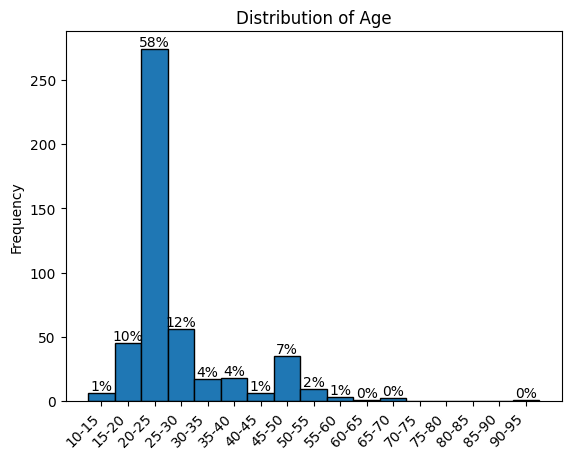

In [29]:
# Define the bins for the histogram
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Plot the histogram and get the counts
counts, _, _ = plt.hist(df.Age, bins=bins, edgecolor='black')

# Calculate the total number of data points
total_data_points = len(df)

# Calculate the percentages for each bin
percentages = [count / total_data_points * 100 for count in counts]

# Create a list of labels for each bin, showing the bin range
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]

# Set the x-axis ticks to be in the middle of each bin
plt.xticks([bins[i] + (bins[i+1] - bins[i]) / 2 for i in range(len(bins) - 1)], labels, rotation=45, ha='right')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title of the histogram
plt.title('Distribution of Age')

# Add text labels for the percentages above each bar
for i in range(len(bins) - 1):
    if percentages[i] > 0:
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{round(percentages[i]):d}%', ha='center', va='bottom')


# Show the histogram
plt.show()

The data is skewed young, with 58% of respondents being between 20 and 25 years old, and 80% being between 15 and 30 years old.



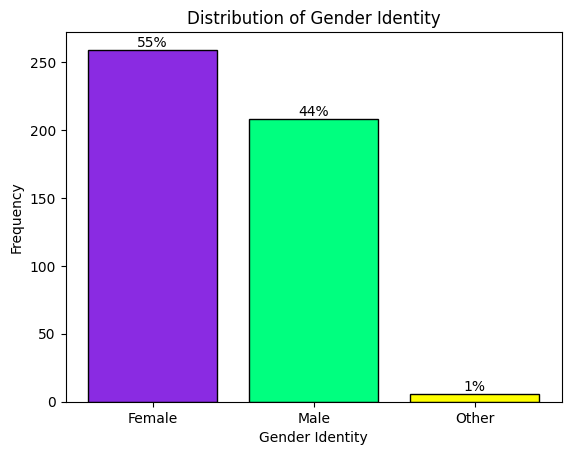

In [30]:
# Map colors to the gender categories
colour_map = {
    'Male': 'springgreen',
    'Female': 'blueviolet',
    'Other': 'yellow'
}

categories = df['Gender'].value_counts().index
counts = df['Gender'].value_counts().values

total_points = counts.sum()

plt.xlabel('Gender Identity')
plt.ylabel('Frequency')
plt.title('Distribution of Gender Identity')
bars = plt.bar(categories, counts, color=[colour_map.get(c) for c in categories], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_points) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.0f}%', ha='center', va='bottom')
plt.show()

55% of respondents answered female for Gender.

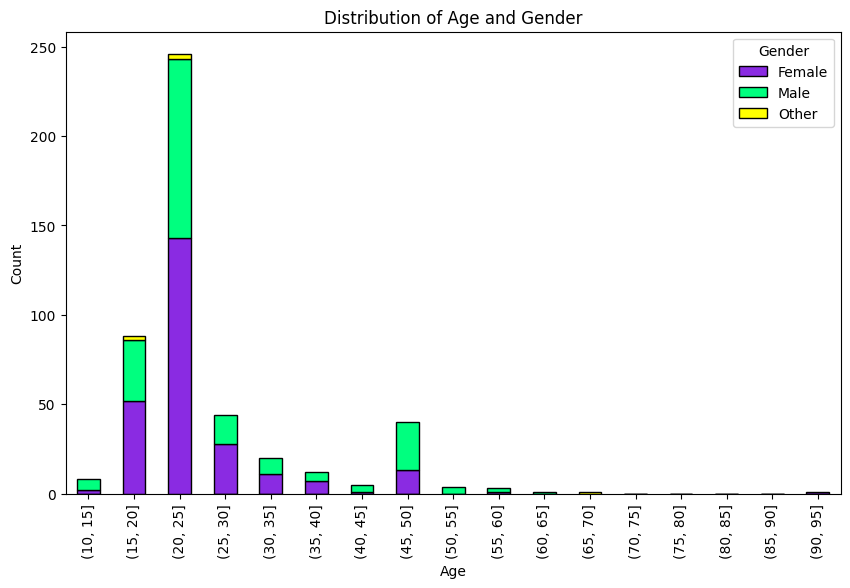

In [31]:
# Define age bins
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Map colors to the gender categories
colour_map = {
    'Male': 'springgreen',
    'Female': 'blueviolet',
    'Other': 'yellow'
}

# Group the data by 'Age' and 'Gender' using the age bins directly in the 'groupby' operation
grouped_data = df.groupby([pd.cut(df['Age'], bins), 'Gender']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True, ax=ax, color=[colour_map.get(c) for c in grouped_data.columns], edgecolor = 'black')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age and Gender')
plt.show()

Where there is a split of genders female outnumbers male in all age bins, aside from ages 10-15, and 40-55. Those that responded "Other" primarily fall into ages 15-25, and one falling in the 65-70 age category.

In [61]:
#Explore relationship status
print(df['Relationship Status'].unique())

['In a relationship' 'Single' 'Married' 'Divorced']


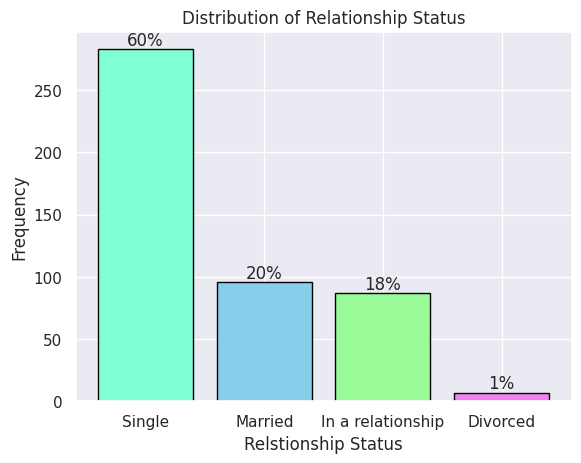

In [62]:
#Plot occupation histogram
# Map colors to the relationship status
colour_map = {
    'In a relationship': 'palegreen',
    'Single': 'aquamarine',
    'Married': 'skyblue',
    'Divorced' : 'violet'
}

categories = df['Relationship Status'].value_counts().index
counts = df['Relationship Status'].value_counts().values

total_points = counts.sum()

plt.xlabel('Relstionship Status')
plt.ylabel('Frequency')
plt.title('Distribution of Relationship Status')
bars = plt.bar(categories, counts, color=[colour_map.get(c) for c in categories], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_points) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.0f}%', ha='center', va='bottom')
plt.show()

The majority of respondents are single (60%) with 38% in a relationship or married. Only 1% are divorced.

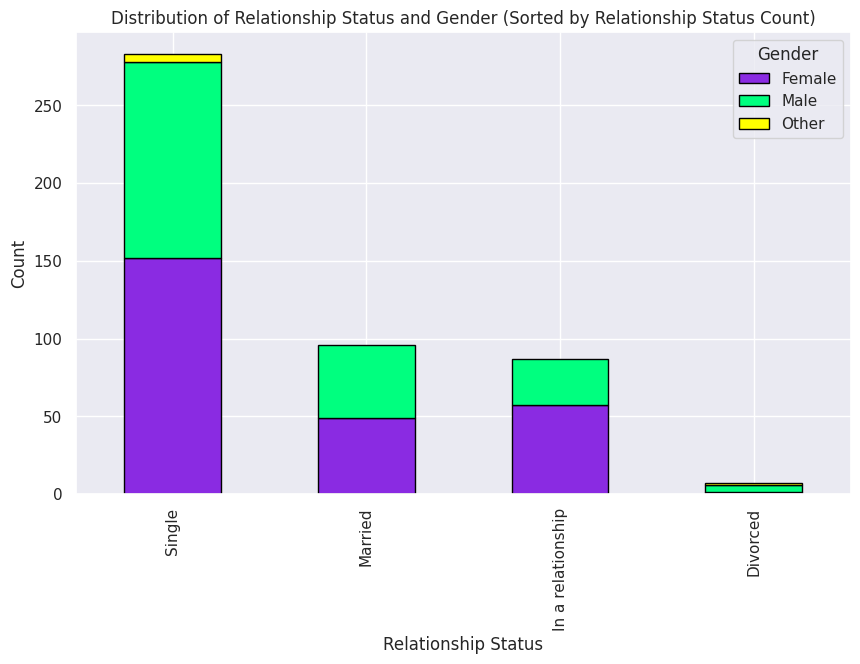

In [63]:
# Relationship Status by gender
# Map colors to the gender categories
colour_map = {
    'Male': 'springgreen',
    'Female': 'blueviolet',
    'Other': 'yellow'
}

# Group the data by 'Relationship Status' and 'Gender', and calculate the count of each combination
grouped_data = df.groupby(['Relationship Status', 'Gender']).size().unstack()

# Calculate the total count of each status and sort the rows based on the count in descending order
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Remove the 'Total' column as it's only needed for sorting
grouped_data.drop(columns='Total', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=[colour_map.get(c) for c in grouped_data.columns], edgecolor = 'black')
ax.set_xlabel('Relationship Status')
ax.set_ylabel('Count')
ax.set_title('Distribution of Relationship Status and Gender (Sorted by Relationship Status Count)')
plt.show()

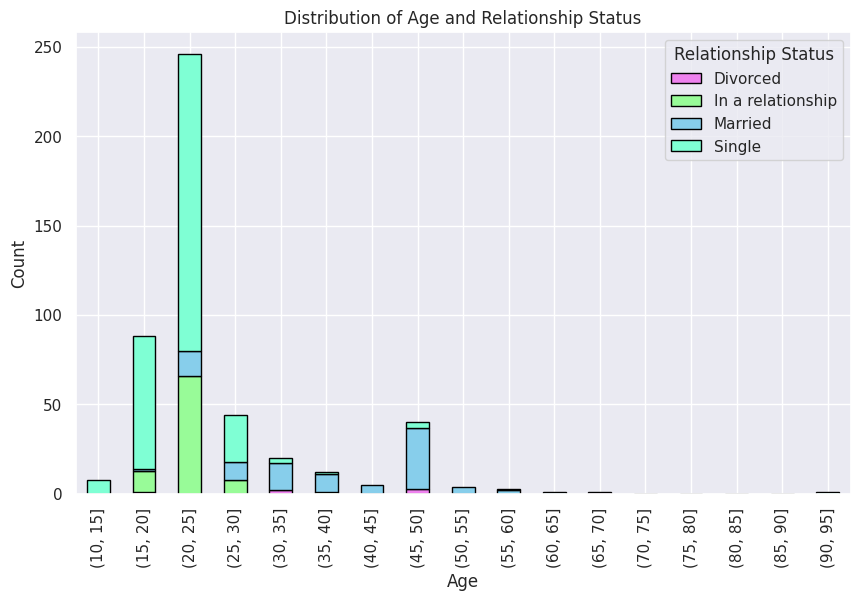

In [64]:
# Define age bins
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

colour_map = {
    'In a relationship': 'palegreen',
    'Single': 'aquamarine',
    'Married': 'skyblue',
    'Divorced' : 'violet'
}

# Group the data by 'Age' and 'Relationship Status' using the age bins directly in the 'groupby' operation
grouped_data = df.groupby([pd.cut(df['Age'], bins), 'Relationship Status']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True, ax=ax, color=[colour_map.get(c) for c in grouped_data.columns], edgecolor = 'black')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age and Relationship Status')
plt.show()

Unsurprisingly, single/in a relationship respondents skew younger, with married respondents tending to be in their 30s or above.

In [32]:
#Explore occupation options
print(df.Occupation.unique())

['University Student' 'School Student' 'Salaried Worker' 'Retired']


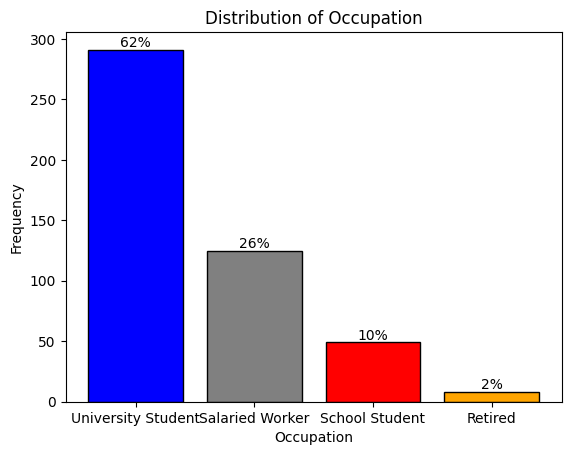

In [33]:
#Plot occupation histogram
# Map colors to the occupation categories
colour_map = {
    'University Student': 'blue',
    'School Student': 'red',
    'Salaried Worker': 'grey',
    'Retired' : 'orange'
}

categories = df['Occupation'].value_counts().index
counts = df['Occupation'].value_counts().values

total_points = counts.sum()

plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Distribution of Occupation')
bars = plt.bar(categories, counts, color=[colour_map.get(c) for c in categories], edgecolor='black')
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_points) * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.0f}%', ha='center', va='bottom')
plt.show()

62% of respondents are University students, with 72% of all respondents being a student of some form.

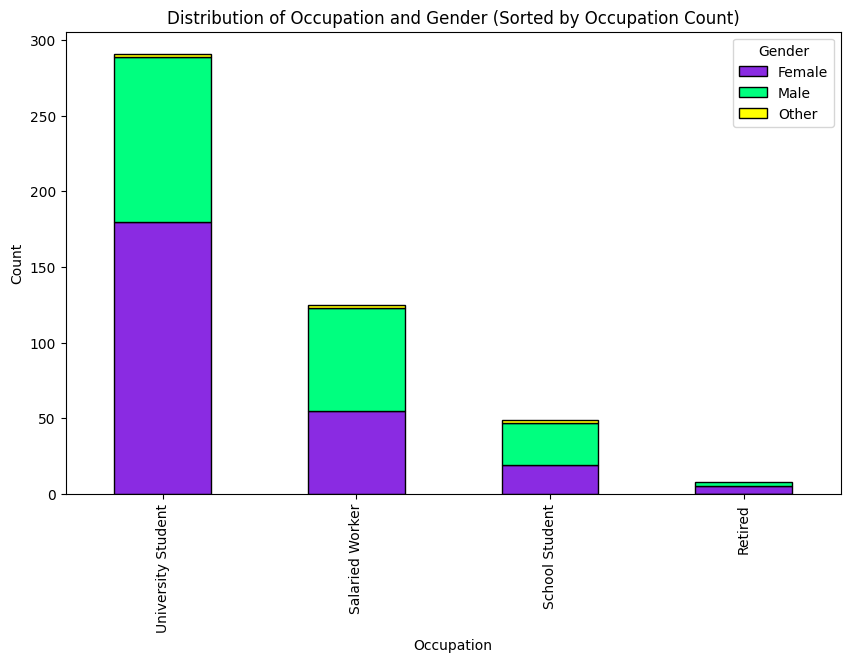

In [34]:
# Occupation by gender
# Map colors to the gender categories
colour_map = {
    'Male': 'springgreen',
    'Female': 'blueviolet',
    'Other': 'yellow'
}

# Group the data by 'Occupation' and 'Gender', and calculate the count of each combination
grouped_data = df.groupby(['Occupation', 'Gender']).size().unstack()

# Calculate the total count of each occupation and sort the rows based on the count in descending order
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values(by='Total', ascending=False)

# Remove the 'Total' column as it's only needed for sorting
grouped_data.drop(columns='Total', inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=[colour_map.get(c) for c in grouped_data.columns], edgecolor = 'black')
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')
ax.set_title('Distribution of Occupation and Gender (Sorted by Occupation Count)')
plt.show()

Female respondents comprised most of those answering University Student or Retired, with male respondents making up most of those answering Salaried Worker or School Student.

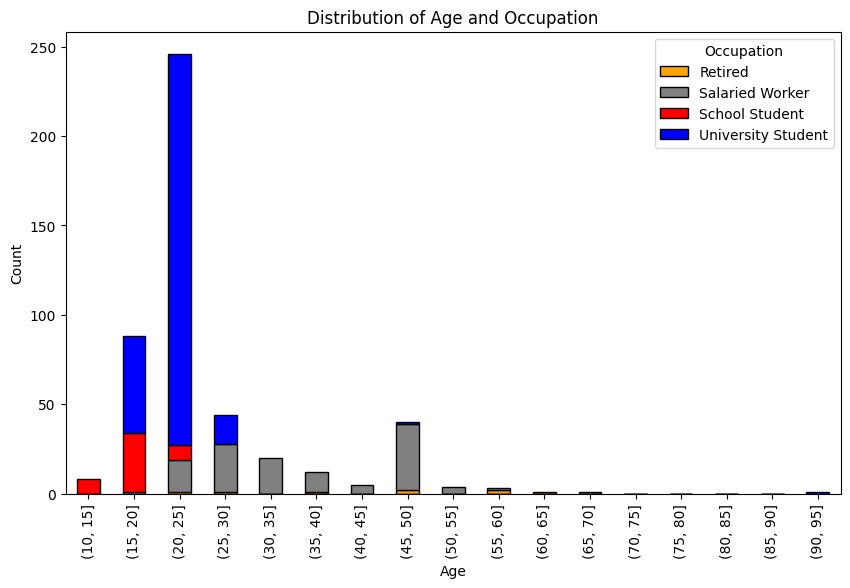

In [35]:
# Define age bins
bins = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

colour_map = {
    'University Student': 'blue',
    'School Student': 'red',
    'Salaried Worker': 'grey',
    'Retired' : 'orange'
}

# Group the data by 'Age' and 'Occupation' using the age bins directly in the 'groupby' operation
grouped_data = df.groupby([pd.cut(df['Age'], bins), 'Occupation']).size().unstack()
fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True, ax=ax, color=[colour_map.get(c) for c in grouped_data.columns], edgecolor = 'black')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age and Occupation')
plt.show()

Students make up most of the respondents under the age of 25. A couple of respondents under the age of 30 responded as retired which is questionable - this may be as a result of options available when answering the questions, but isn't clear in the source data.

##Platforms used and hours spent online

In [40]:
#Create a Treemap for platforms used - colours used are all aligned to official brand colours

import plotly.graph_objects as go
# Define custom colors for each platform
colours = {
    'Discord': 'rgb(88, 101, 242)',
    'Facebook': 'rgb(66, 103, 178)',
    'Instagram': 'rgb(193, 53, 132)',
    'Pinterest': 'rgb(230, 0, 35)',
    'Reddit': 'rgb(255, 69, 0)',
    'Snapchat': 'rgb(255, 252, 0)',
    'TikTok': 'rgb(0, 242, 234)',
    'Twitter': 'rgb(29, 161, 242)',
    'YouTube': 'rgb(255, 0, 0)'
}

# Extract only the platform columns for counting
platform_columns = ['Discord', 'Facebook', 'Instagram', 'Pinterest', 'Reddit', 'Snapchat', 'TikTok', 'Twitter', 'YouTube']
platform_counts = df[platform_columns].sum()

# Calculate total number of people using social media
total_people = len(df)

# Calculate percentages and format as integers
platform_percentages = ((platform_counts / total_people) * 100).astype(int)

# Create the Treemap figure
fig = go.Figure(go.Treemap(
    labels=platform_counts.index,
    parents=[''] * len(platform_counts),
    values=platform_counts,
    marker_colors=[colours.get(platform, 'rgb(128, 128, 128)') for platform in platform_counts.index],
    branchvalues='total',
    text=platform_percentages,  # Use the formatted percentages as data labels
    textinfo='text+label',  # Show both the formatted percentage and label
    textfont=dict(size=14),
    texttemplate='%{label}: %{text}%'
))

# Update the layout for better visualization
fig.update_layout(
    title='Social Media Platform Usage',
    margin=dict(t=30, l=10, r=10, b=10),
    font=dict(size=14),
)

# Show the plot
fig.show()

YouTube and Facebook are the most widely used social media at 85% and 84% respectively, closely followed by Instagram at 74%.

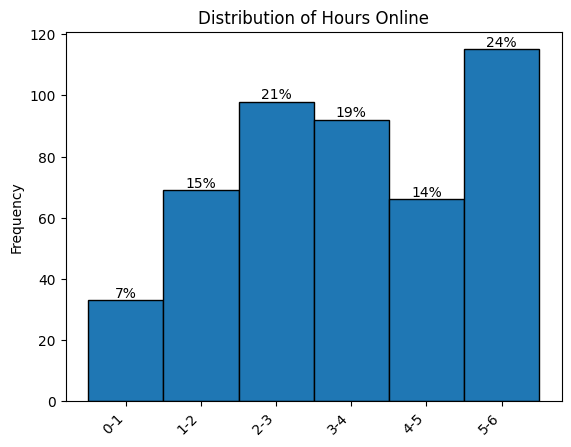

In [37]:
# Define the bins for the histogram
bins = [0, 1, 2, 3, 4, 5, 6]

# Plot the histogram and get the counts
counts, _, _ = plt.hist(df['Hours Online'], bins=bins, edgecolor='black')

# Calculate the total number of data points
total_data_points = len(df)

# Calculate the percentages for each bin
percentages = [count / total_data_points * 100 for count in counts]

# Create a list of labels for each bin, showing the bin range
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)]

# Set the x-axis ticks to be in the middle of each bin
plt.xticks([bins[i] + (bins[i+1] - bins[i]) / 2 for i in range(len(bins) - 1)], labels, rotation=45, ha='right')

# Set the y-axis label
plt.ylabel('Frequency')

# Set the title of the histogram
plt.title('Distribution of Hours Online')

# Add text labels for the percentages above each bar
for i in range(len(bins) - 1):
    if percentages[i] > 0:
        plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, counts[i], f'{round(percentages[i]):d}%', ha='center', va='bottom')


# Show the histogram
plt.show()

24% of respondents spend more than 5 hours online. 40% spend between 2 and 4 hours online.



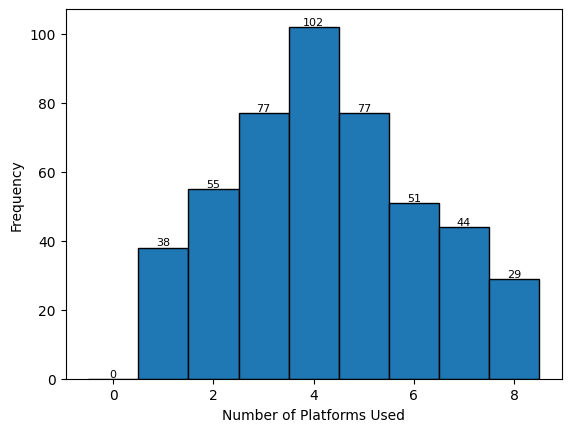

In [41]:
# Plot the distribution of Total Platforms
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n, bins, patches = plt.hist(df['Total Platforms'], bins=bins, edgecolor='black', align='left')
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height()
    plt.annotate(f'{int(y)}', (x, y), ha='center', va='bottom', fontsize=8)
plt.xlabel('Number of Platforms Used')
plt.ylabel('Frequency')
plt.show()

All respondents use at least one platform, with 102 of 473 using 4. No respondent uses all 9 platforms included in the dataset, though 29 respondents are close at 8.

##Mental Health Outcomes

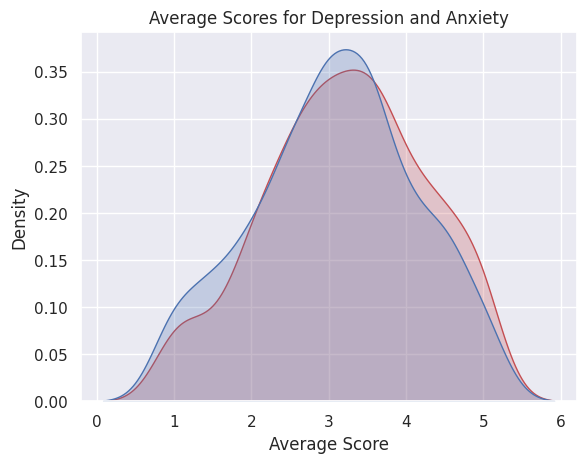

In [58]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sb.set(style="darkgrid")

# plotting both distibutions on the same figure
fig = sb.kdeplot(df['Depression Total']/3, label = 'Depression', fill=True, color="r")
fig = sb.kdeplot(df['Anxiety Total']/2, label = 'Anxiety', fill=True, color="b")
plt.xlabel('Average Score')
plt.title('Average Scores for Depression and Anxiety')
plt.show()

Average anxiety and depression scores have a fairly similar distribution. The way in which these questions were scored had 1 as symptoms never experienced, and 5 as experienced regularly. The distribution indicates most respondents have some experience of depression and anxiety symptoms, with depression symptoms skewing towards being experienced with more regularity than anxiety symptoms.

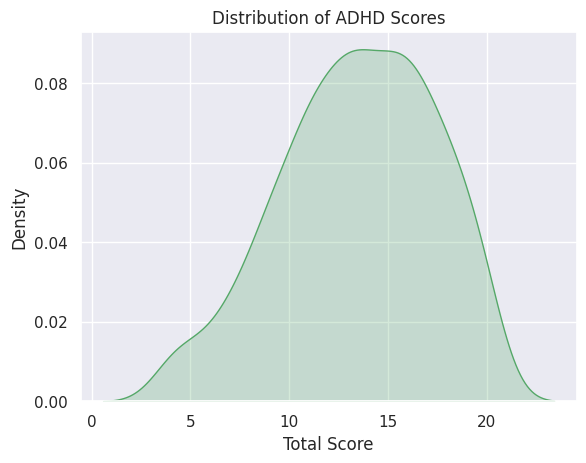

In [56]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sb.set(style="darkgrid")

# plotting both distibutions on the same figure
fig = sb.kdeplot(df['ADHD Total'], label = 'ADHD', fill=True, color="g")
plt.xlabel('Total Score')
plt.title('Distribution of ADHD Scores')
plt.show()

ADHD questions were scored similarly to anxiety and depression questions, with a score of 1 meaning no symptoms experienced and 5 indicating they are experienced regularly. As there were 4 questions relating to ADHD, the highest total score here would be 20. As with the depression questions it seems ADHD symptoms skew more towards being experienced with some regularity.

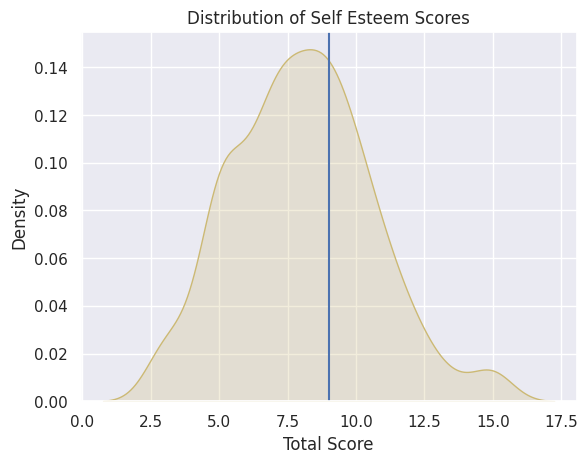

In [60]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sb.set(style="darkgrid")

# plotting both distibutions on the same figure
fig = sb.kdeplot(df['SE Total'], label = 'Self Esteem', fill=True, color="y")
plt.axvline(9, 0,1)
plt.xlabel('Total Score')
plt.title('Distribution of Self Esteem Scores')
plt.show()

The answers to the self esteem questions, although scored on a 5-point Likert scale as the other questions, indicate a different outcome. 3 in this situation indicates no impact to self esteem (positive or negative), with 1 meaning a very negative impact to self-esteem and 5 a very positive impact. As there were 3 questions relating to self esteem, 9 is the mid-point here. The distribution of answers looks to skew towards the negative side here.

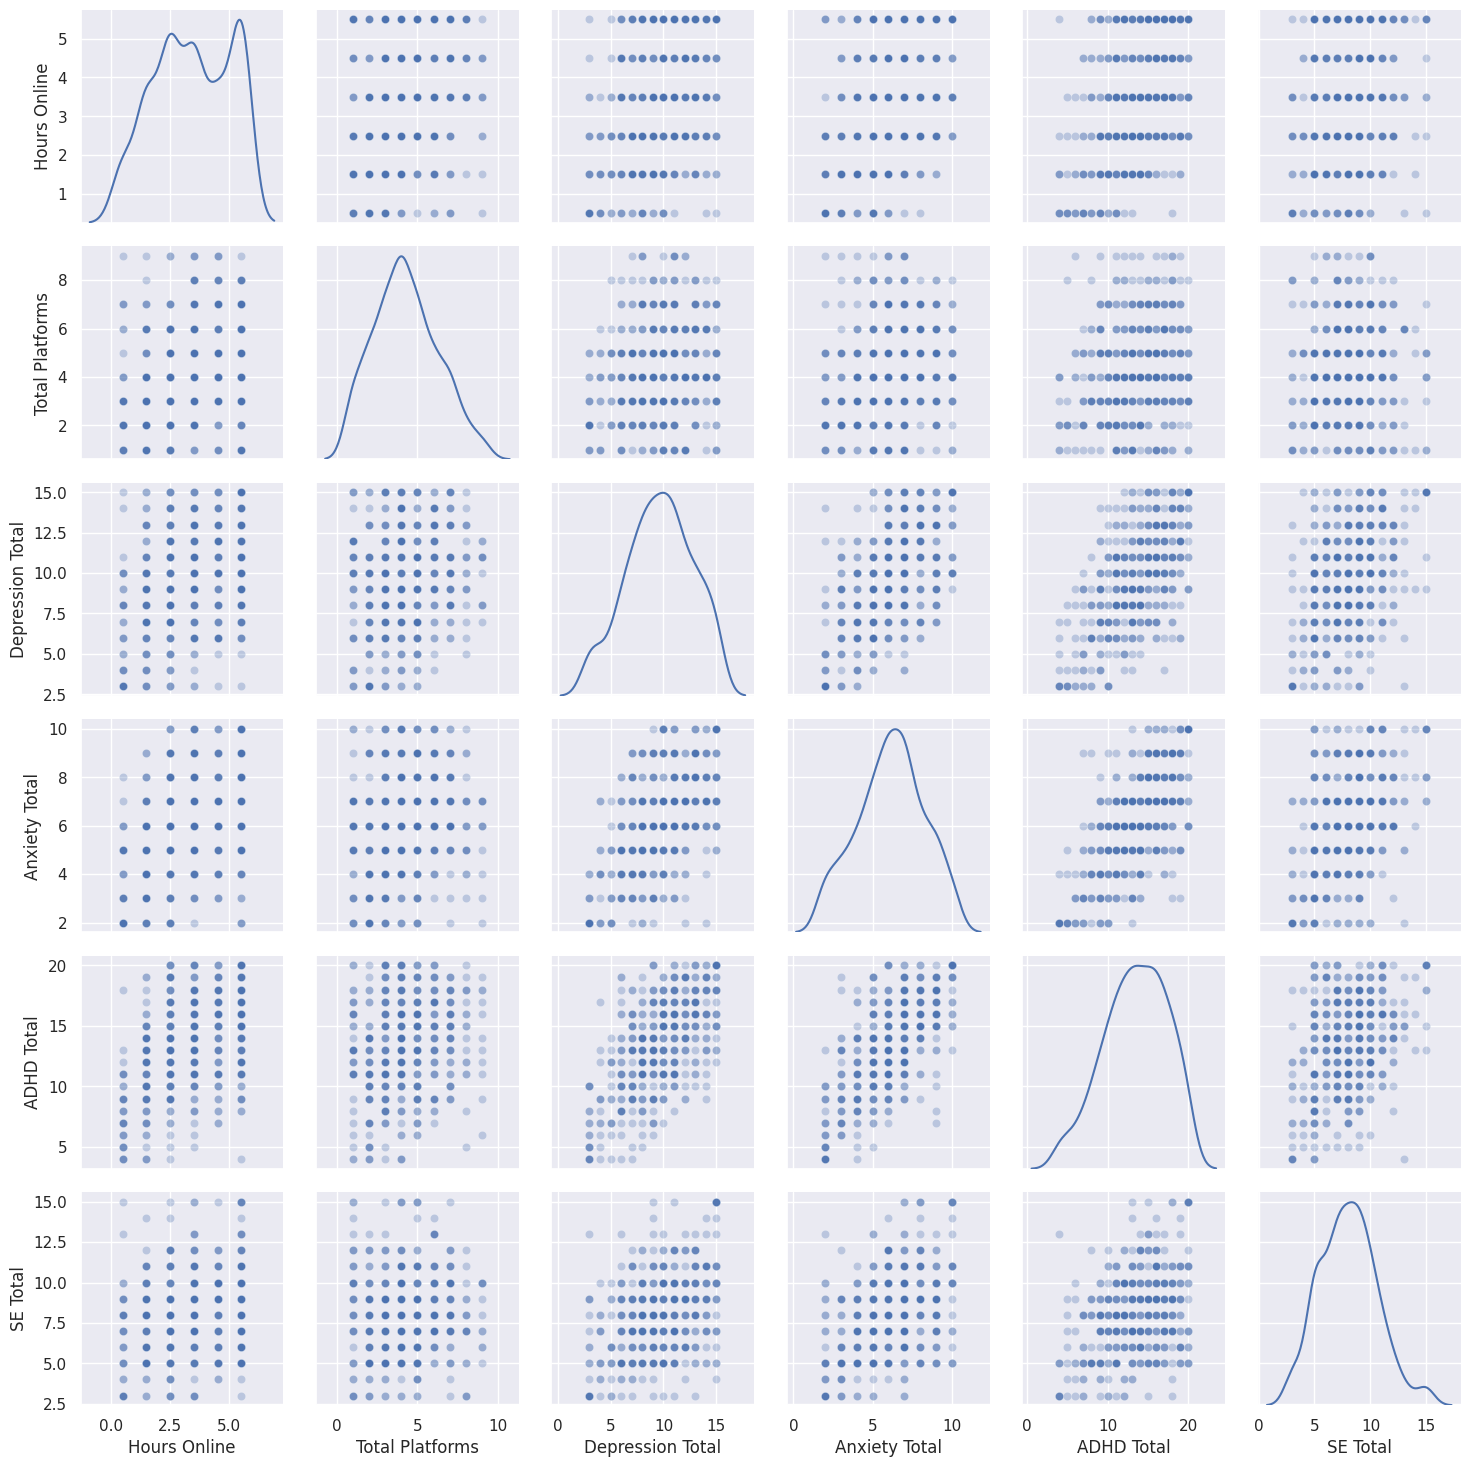

In [79]:
# Reduce dataset for pairgrid
pairdf = df[['Hours Online', 'Total Platforms', 'Depression Total', 'Anxiety Total', 'ADHD Total', 'SE Total']]

# Set up PairGrid
g = sb.PairGrid(pairdf, diag_sharey=False)

# Customize scatterplot appearance
g.map_upper(sb.scatterplot, alpha=0.3)
g.map_lower(sb.scatterplot, alpha=0.3)
g.map_diag(sb.kdeplot)

# Show the plot
plt.show()
